In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("vgsales.csv")


In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Data description

In this data set there are 11 columns. Their names and data types as follows:

* **Rank** - Ranking of overall sales, integer

* **Name** - The games name, object

* **Platform** - Platform of the games release (i.e. PC,PS4, etc.), object

* **Year** - Year of the game's release, float

* **Genre** - Genre of the game ,object

* **Publisher** - Publisher of the game

* **NA_Sales** - Sales in North America (in millions)

* **EU_Sales** - Sales in Europe (in millions)

* **JP_Sales** - Sales in Japan (in millions)

* **Other_Sales** - Sales in the rest of the world (in millions)

* **Global_Sales** - Total worldwide sales.

#### Checking for missing values


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.describe(include= 'object')

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


Rank column is useless as index already exists

In [6]:
df.drop("Rank", axis = 1, inplace = True)

In [7]:
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

There are missing values in year and publisher column


In [8]:
df.shape

(16598, 10)

In [9]:
df.Year.isnull().sum()/16598 * 100


1.6327268345583803

In [10]:
df.Publisher.isnull().sum()/16598 * 100

0.3494396915290999

Since missing values are not in high percentage, dropping them will have minimal effect on insights

In [11]:
df.dropna(inplace = True)

In [12]:
df.shape

(16291, 10)

After dropping values, confirming that tehere are no null values left

In [13]:
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Year is in object form changing it to suitable data type int for analysis

In [14]:
df.Year = df.Year.astype('int')

In [15]:
df.Year.dtype

dtype('int32')

### Checking for Outliners

In [16]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


On examining Sales columns we can see that many columns have a lot of difference between 75th quantile and max hence confirming using box plots

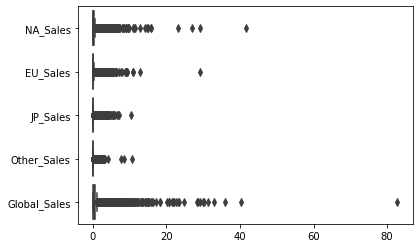

In [17]:
sns.boxplot(data=df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]], orient="h")
plt.show()

As is visible from above boxplot there are outliners in NA_Sales , and Global_Sales lets have a look at them

In [18]:
df[df.NA_Sales ==df.NA_Sales.max()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [19]:
df[df.Global_Sales  == df.Global_Sales.max()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


As is visible the outliner in both column is the same entry but is not an error or outliner as wii sports is an **iconic game** and hence must not be **removed**

### Univariate analysis


In [20]:
#total number of games 
df.Name.value_counts().sum()

16291

In [21]:
#total games released by every platform
# df['Platform'].
platform = df.groupby('Platform').size().reset_index(name  ='count')
platform.sort_values(by = ['count'], ascending = False, inplace = True)

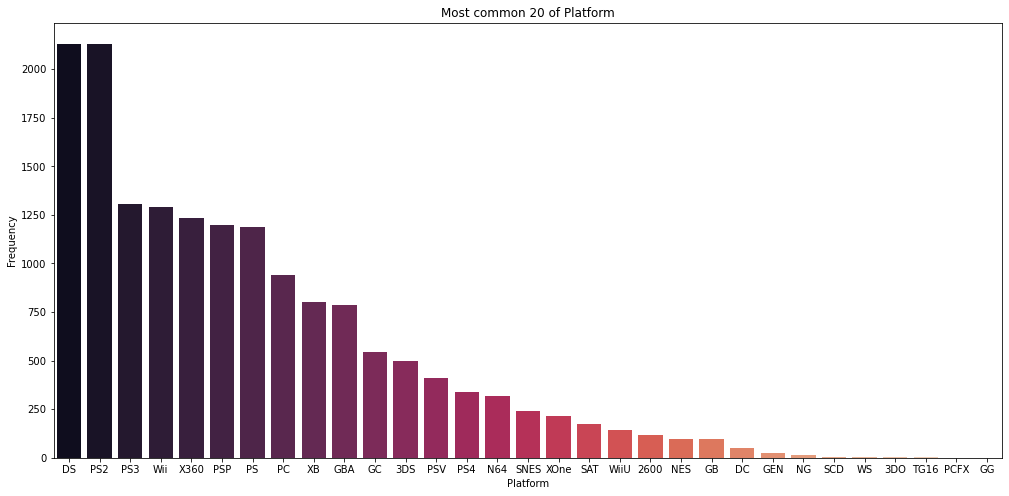

In [22]:
platform_name = list(platform.Platform)
count = list(platform['count'])
plt.figure(figsize=(17,8))
ax=sns.barplot( x = platform_name, y = count, palette = 'rocket')
plt.xlabel('Platform')
plt.ylabel('Frequency')
plt.title('Most common 20 of Platform')
plt.show()

Through above graph we can see which are the major platforms available in the market throughout the years, their performance aline can vouch for their performance and user expierence.
Some of the major platforms are:
* DS
* PS2
* PS3
* Wii
* X360
* PSP


In [23]:
publisher_count = df.groupby('Publisher').size().reset_index(name = 'count')

In [24]:
publisher_count=publisher_count.sort_values('count', ascending = False).head(10)

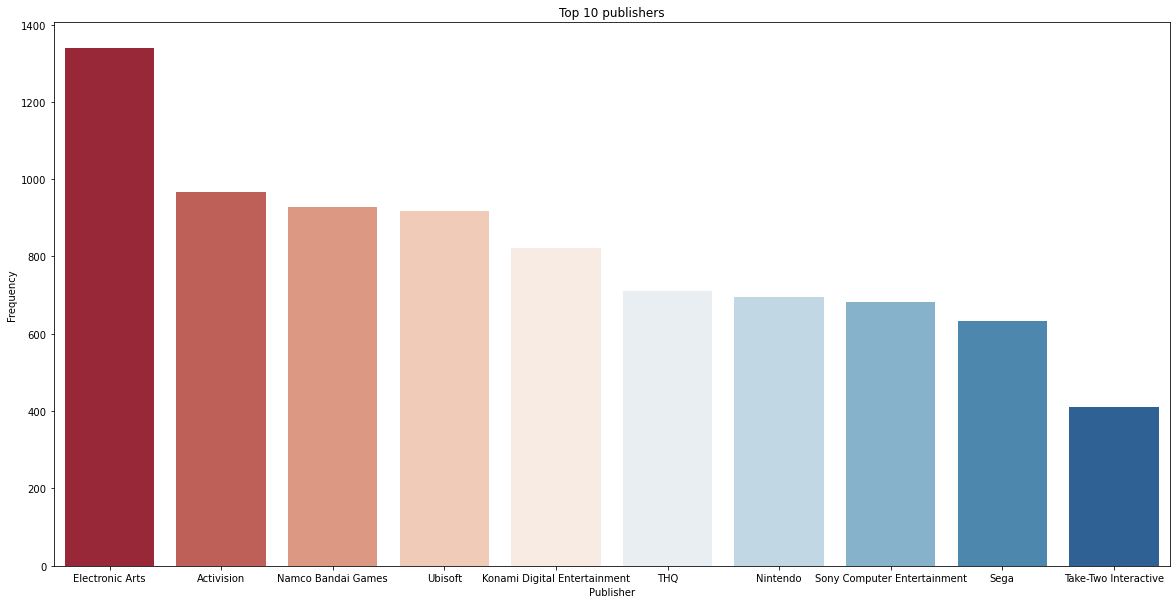

In [25]:
plt.figure(figsize = (20,10))
sns.barplot(x='Publisher', y = 'count', data = publisher_count, palette = 'RdBu')
plt.xlabel('Publisher')
plt.ylabel('Frequency')
plt.title('Top 10 publishers')
plt.show()


Above barplot helps us understand the major publisher and the no. of games they have released throughout the years

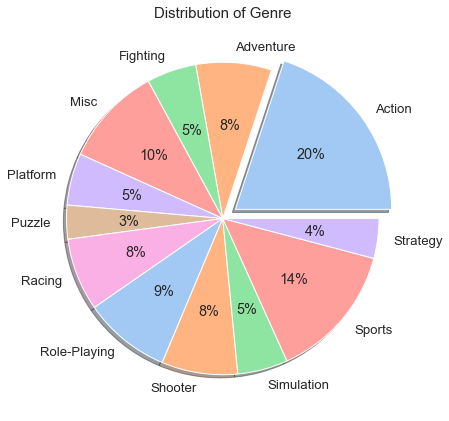

In [26]:
genre_count = df.groupby('Genre').size().reset_index(name = 'no_of_games')
plt.figure(figsize = (7,10))
sns.set(font_scale= 1.2)
colors = sns.color_palette('pastel')[0:7]
explode_arr = np.zeros(genre_count.no_of_games.size)
explode_arr[0] = 0.1
piefig = plt.pie(genre_count.no_of_games, labels = genre_count.Genre, colors = colors, autopct='%.0f%%', shadow = True, explode= explode_arr)
plt.title('Distribution of Genre', fontsize = 15)
plt.show()

Above distribution shows that Action has the major share of games(20%) and different types of genre available in games.

## Bivariate analysis


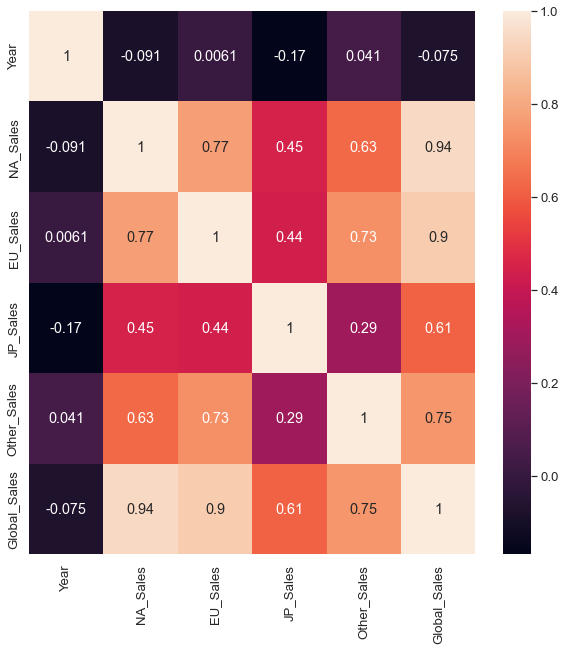

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

No clear relation of cause and result visible from heatmap

### World


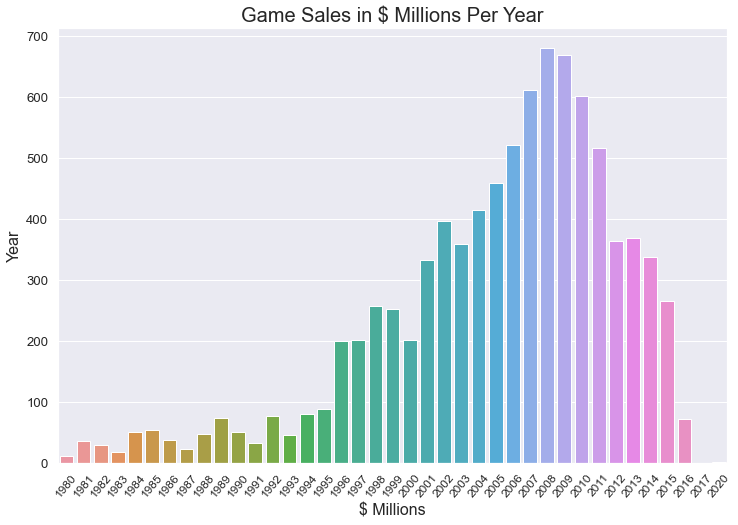

In [28]:
y = df.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel='$ Millions', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year', fontsize=20)
plt.show();

2008 had the most sale 
Above graph shows how the game industry has grown through the year to todays billion dollar industry, and will go on to grow making it favourable for employment.


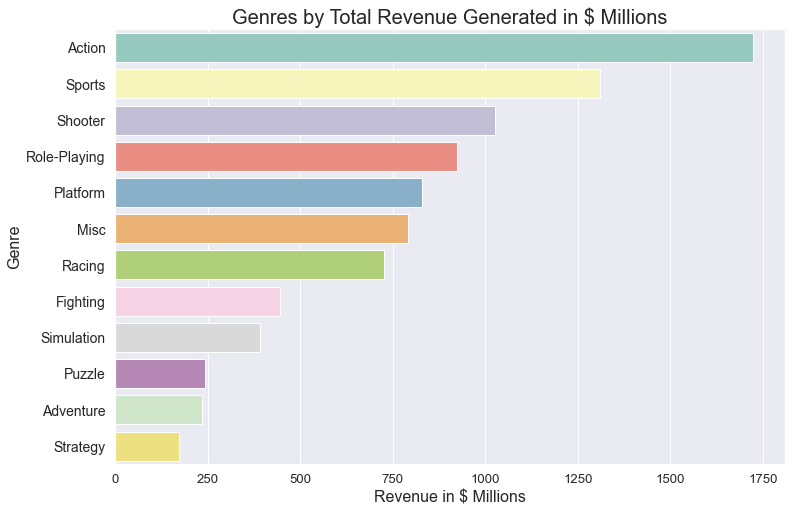

In [29]:
rev = df.groupby(['Genre']).sum()['Global_Sales']
rev = pd.DataFrame(rev.sort_values(ascending=False))
genres = rev.index
rev.columns = ['Revenue']

colors = sns.color_palette('Set3', len(rev))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = genres , x = 'Revenue', data=rev, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Genres by Total Revenue Generated in $ Millions', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=14)
plt.show();

Action genre created the most revenue which also why it also had the most number of games released throughout the years

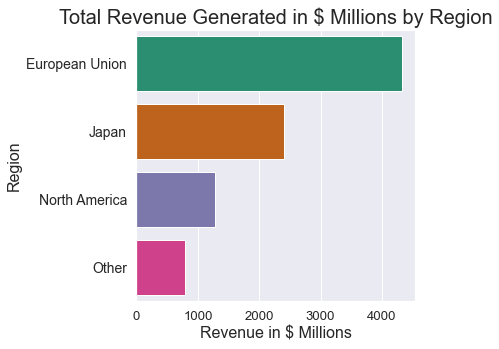

In [30]:
data = df.sum()
data = pd.DataFrame([data['EU_Sales'], data['JP_Sales'], data['NA_Sales'], data['Other_Sales']])
regions = ['European Union', 'Japan', 'North America', 'Other']
data.index = regions
data.columns = ['Revenue']
data = data.sort_values(by='Revenue', ascending=False)

plt.figure(figsize=(5,5))
colors = sns.color_palette("Dark2", len(data))
ax = sns.barplot(y = regions , x = 'Revenue', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Region', fontsize=16)
ax.set_title(label='Total Revenue Generated in $ Millions by Region', fontsize=20)
ax.set_yticklabels(labels = regions, fontsize=14)
plt.show();

From the above graph it is easily visible that most of the revenue comes from the two markets of European union followed by Japan and then north America, it means that any change in trends in these markets will have impact on whole industry

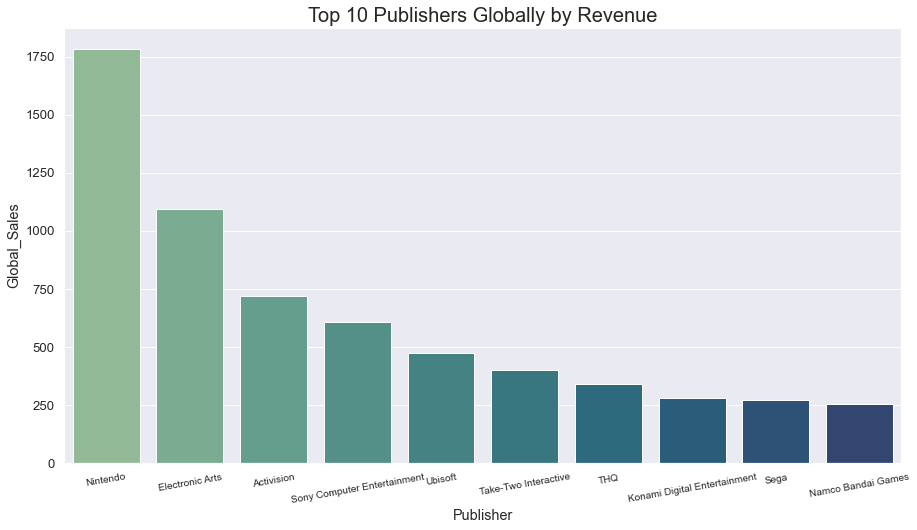

In [31]:
PublisherTotalGames = df['Global_Sales'].groupby(df['Publisher']).sum().sort_values(ascending=False).reset_index(name= 'Global_Sales')
PublisherTotalGames = PublisherTotalGames.head(10)

plt.figure(figsize=(15,8))
fig = sns.barplot(data=PublisherTotalGames, x="Publisher", y="Global_Sales", palette = "crest")
fig.set_xticklabels(labels = PublisherTotalGames["Publisher"], fontsize=10, rotation=10)
fig.set_title(label= "Top 10 Publishers Globally by Revenue", fontsize= 20)


plt.show()

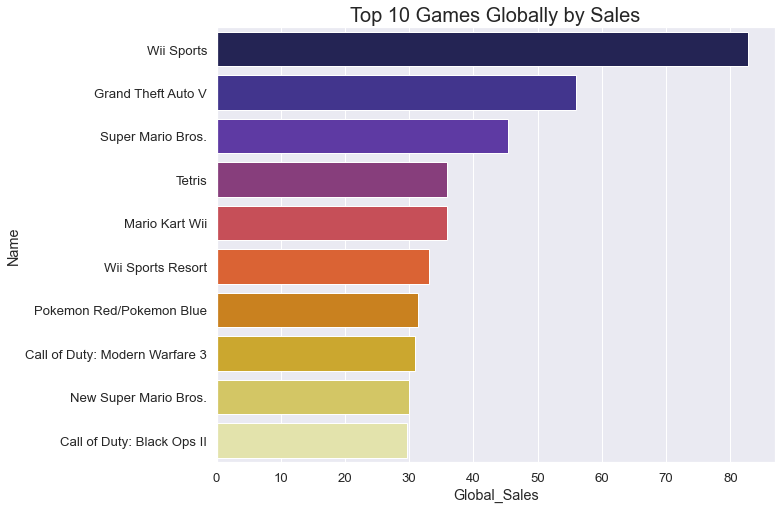

In [32]:
NameTotalGames = df['Global_Sales'].groupby(df['Name']).sum().sort_values(ascending=False).reset_index(name= 'Global_Sales')
NameTotalGames = NameTotalGames.head(10)

plt.figure(figsize=(10,8))
fig = sns.barplot(data=NameTotalGames, x="Global_Sales", y="Name",orient = 'h', palette = "CMRmap")
fig.set_title(label= "Top 10 Games Globally by Sales", fontsize= 20)
plt.show()

Above are the games that have set various landmarks in sales and changed trends in industry, studying such games deeply will provide more insights

### North America

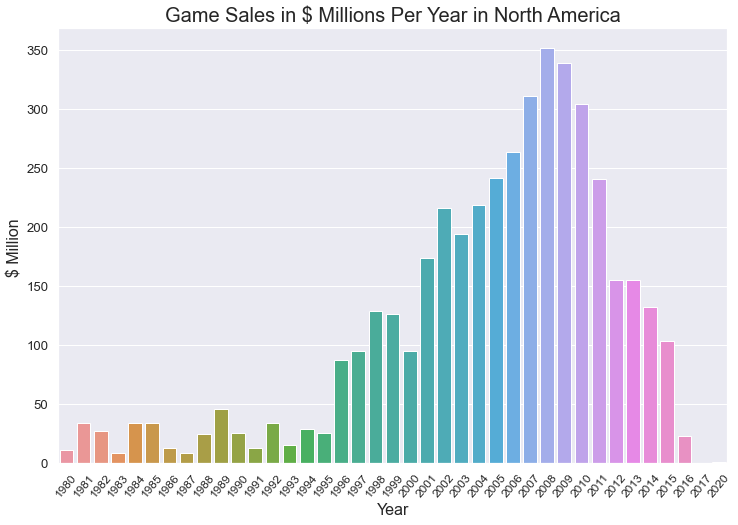

In [33]:
y = df.groupby(['Year']).sum()
y = y['NA_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel= 'Year', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='$ Million ', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year in North America', fontsize=20)
plt.show();

Similar to gobal sales, North America saw highest sale in the year 2008

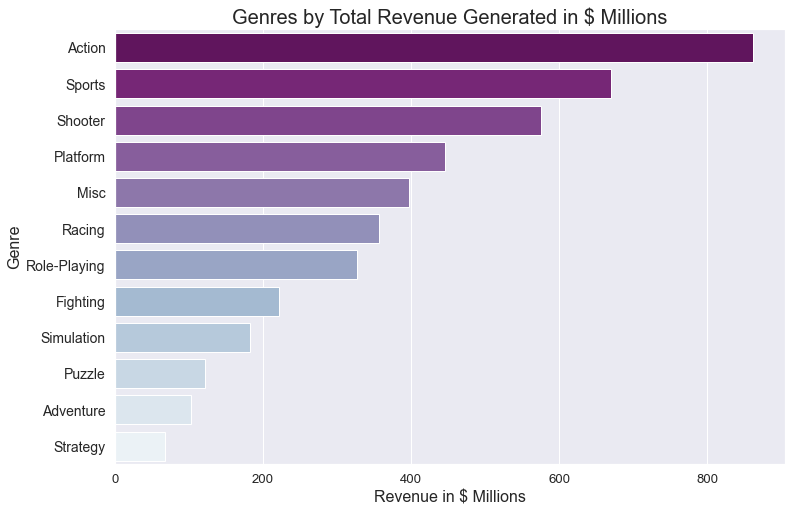

In [34]:
rev = df.groupby(['Genre']).sum()['NA_Sales']
rev = pd.DataFrame(rev.sort_values(ascending=False))
genres = rev.index
rev.columns = ['Revenue']

colors = sns.color_palette('Set3', len(rev))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = genres , x = 'Revenue', data=rev, orient='h', palette='BuPu_r')
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Genres by Total Revenue Generated in $ Millions', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=14)
plt.show();

Action genre is widely popular in north american market this trend should have clear consequence on sales of games in North American market

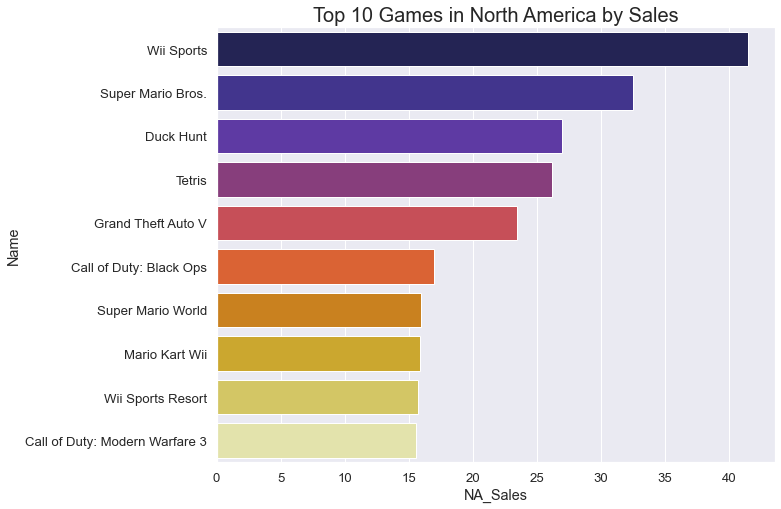

In [35]:
NameTotalGames = df['NA_Sales'].groupby(df['Name']).sum().sort_values(ascending=False).reset_index(name= 'NA_Sales')
NameTotalGames = NameTotalGames.head(10)

plt.figure(figsize=(10,8))
fig = sns.barplot(data=NameTotalGames, x="NA_Sales", y="Name",orient = 'h', palette = "CMRmap")
fig.set_title(label= "Top 10 Games in North America by Sales", fontsize= 20)
plt.show()

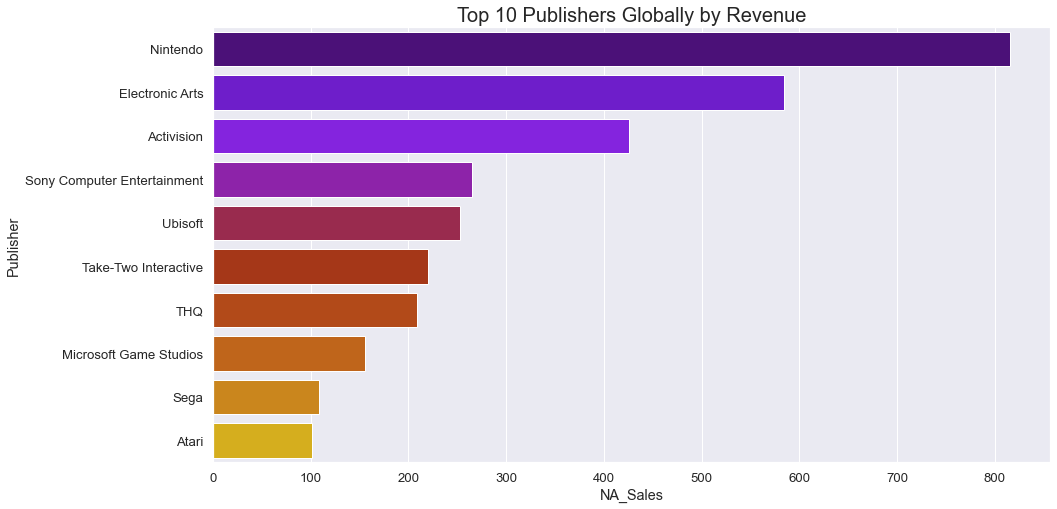

In [36]:
PublisherTotalGames = df['NA_Sales'].groupby(df['Publisher']).sum().sort_values(ascending=False).reset_index(name= 'NA_Sales')
PublisherTotalGames = PublisherTotalGames.head(10)

plt.figure(figsize=(15,8))
fig = sns.barplot(data=PublisherTotalGames, x="NA_Sales", y="Publisher", palette = "gnuplot", orient = 'h')
fig.set_title(label= "Top 10 Publishers Globally by Revenue", fontsize= 20)


plt.show()

### EUROPE MARKET

In [37]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


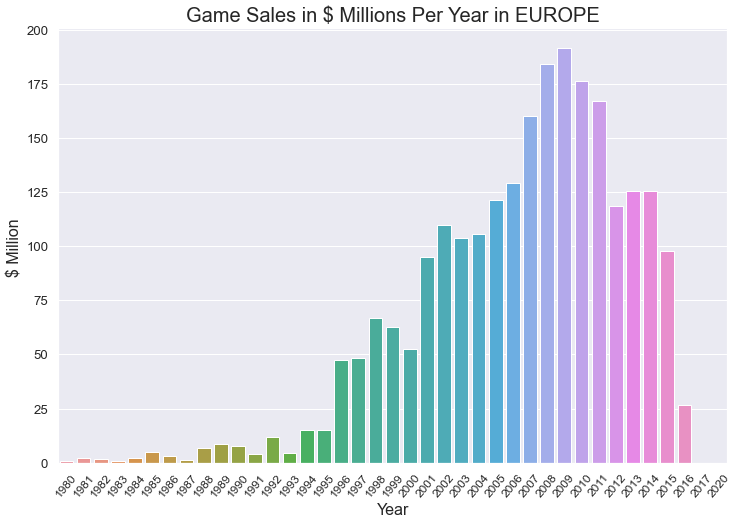

In [38]:
y = df.groupby(['Year']).sum()
y = y['EU_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel= 'Year', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='$ Million ', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year in EUROPE', fontsize=20)
plt.show();

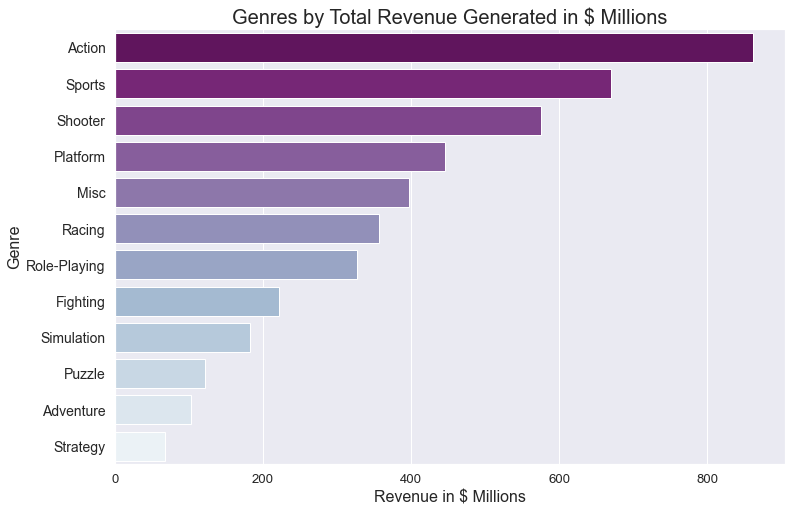

In [39]:
rev = df.groupby(['Genre']).sum()['NA_Sales']
rev = pd.DataFrame(rev.sort_values(ascending=False))
genres = rev.index
rev.columns = ['Revenue']

colors = sns.color_palette('Set3', len(rev))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = genres , x = 'Revenue', data=rev, orient='h', palette='BuPu_r')
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Genres by Total Revenue Generated in $ Millions', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=14)
plt.show();

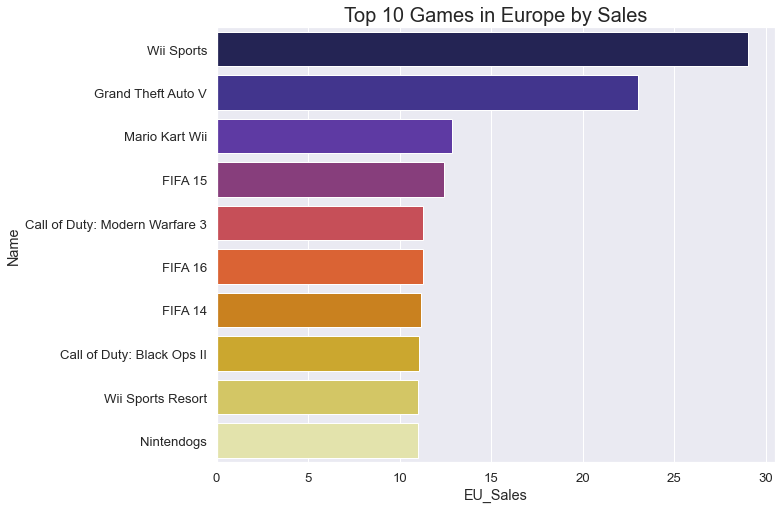

In [40]:
NameTotalGames = df['EU_Sales'].groupby(df['Name']).sum().sort_values(ascending=False).reset_index(name= 'EU_Sales')
NameTotalGames = NameTotalGames.head(10)

plt.figure(figsize=(10,8))
fig = sns.barplot(data=NameTotalGames, x="EU_Sales", y="Name",orient = 'h', palette = "CMRmap")
fig.set_title(label= "Top 10 Games in Europe by Sales", fontsize= 20)
plt.show()

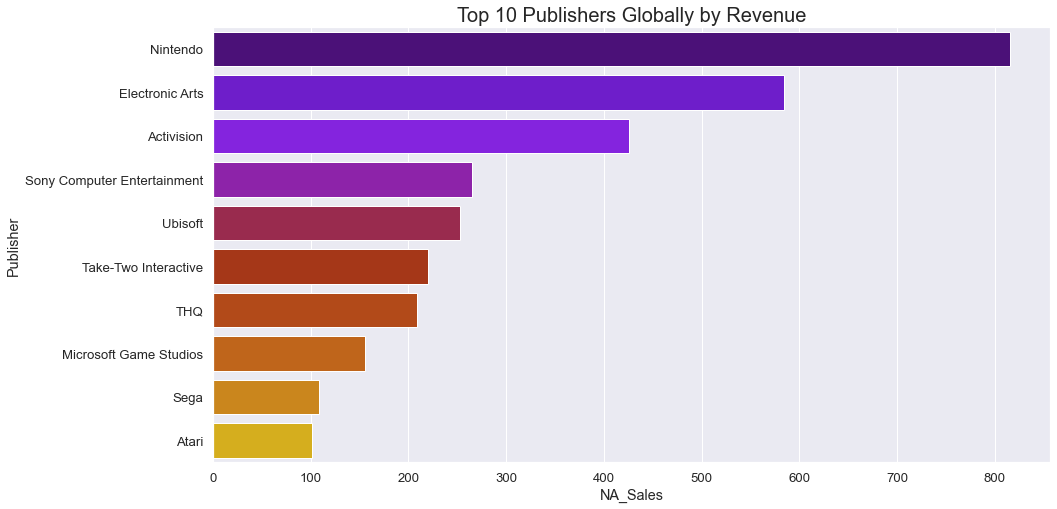

In [41]:
PublisherTotalGames = df['NA_Sales'].groupby(df['Publisher']).sum().sort_values(ascending=False).reset_index(name= 'NA_Sales')
PublisherTotalGames = PublisherTotalGames.head(10)

plt.figure(figsize=(15,8))
fig = sns.barplot(data=PublisherTotalGames, x="NA_Sales", y="Publisher", palette = "gnuplot", orient = 'h')
fig.set_title(label= "Top 10 Publishers Globally by Revenue", fontsize= 20)


plt.show()

### JAPAN MARKET

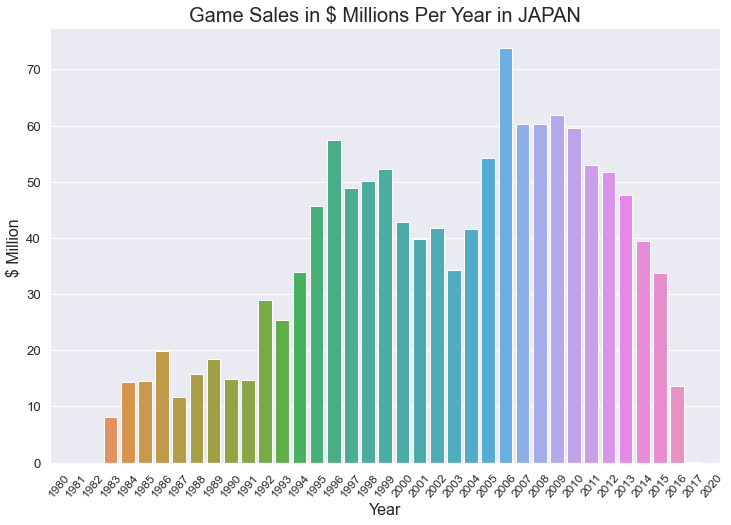

In [42]:
y = df.groupby(['Year']).sum()
y = y['JP_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel= 'Year', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='$ Million ', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year in JAPAN', fontsize=20)
plt.show();

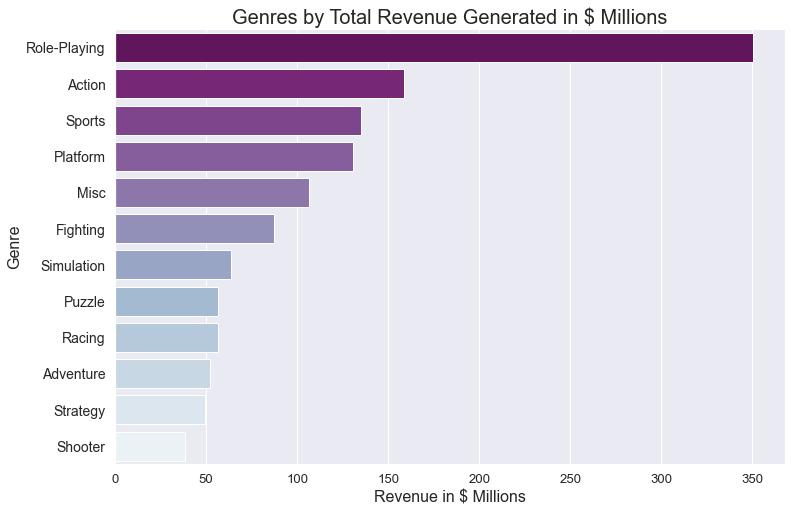

In [43]:
rev = df.groupby(['Genre']).sum()['JP_Sales']
rev = pd.DataFrame(rev.sort_values(ascending=False))
genres = rev.index
rev.columns = ['Revenue']

colors = sns.color_palette('Set3', len(rev))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = genres , x = 'Revenue', data=rev, orient='h', palette='BuPu_r')
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Genres by Total Revenue Generated in $ Millions', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=14)
plt.show();

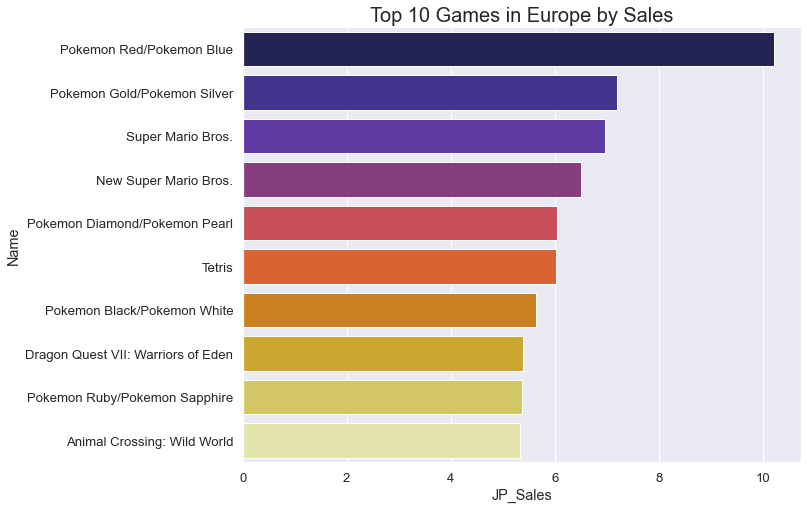

In [44]:
NameTotalGames = df['JP_Sales'].groupby(df['Name']).sum().sort_values(ascending=False).reset_index(name= 'JP_Sales')
NameTotalGames = NameTotalGames.head(10)

plt.figure(figsize=(10,8))
fig = sns.barplot(data=NameTotalGames, x="JP_Sales", y="Name",orient = 'h', palette = "CMRmap")
fig.set_title(label= "Top 10 Games in Europe by Sales", fontsize= 20)
plt.show()

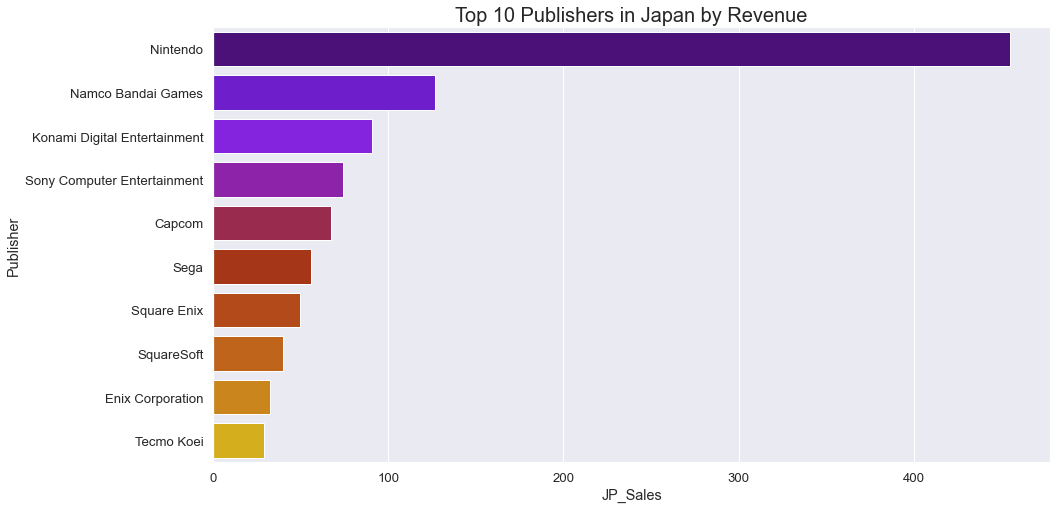

In [45]:
PublisherTotalGames = df['JP_Sales'].groupby(df['Publisher']).sum().sort_values(ascending=False).reset_index(name= 'JP_Sales')
PublisherTotalGames = PublisherTotalGames.head(10)

plt.figure(figsize=(15,8))
fig = sns.barplot(data=PublisherTotalGames, x="JP_Sales", y="Publisher", palette = "gnuplot", orient = 'h')
fig.set_title(label= "Top 10 Publishers in Japan by Revenue", fontsize= 20)


plt.show()

### OTHER MARKETS

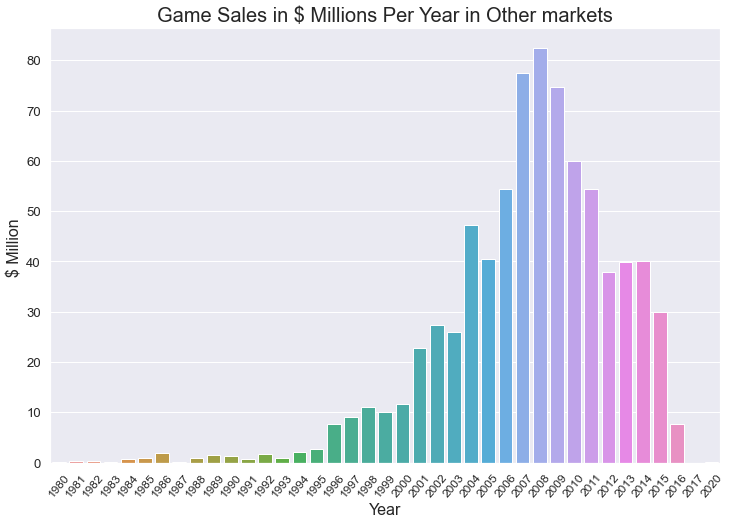

In [46]:
y = df.groupby(['Year']).sum()
y = y['Other_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel= 'Year', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='$ Million ', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year in Other markets', fontsize=20)
plt.show();

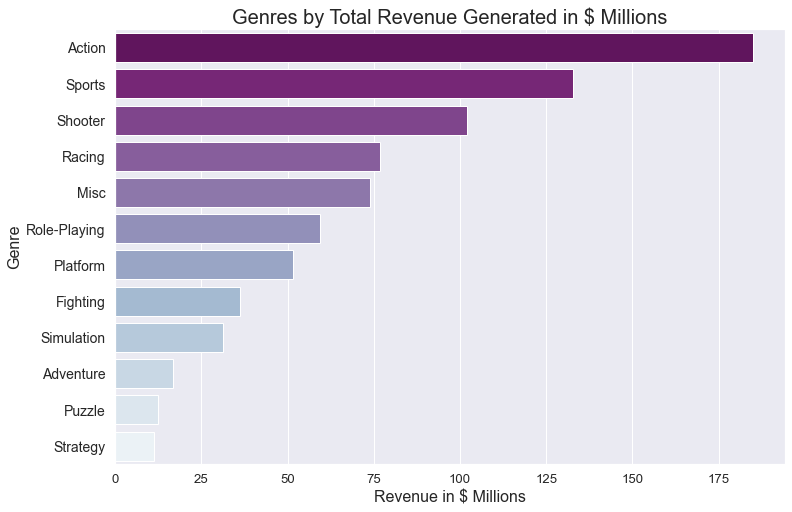

In [47]:
rev = df.groupby(['Genre']).sum()['Other_Sales']
rev = pd.DataFrame(rev.sort_values(ascending=False))
genres = rev.index
rev.columns = ['Revenue']

colors = sns.color_palette('Set3', len(rev))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = genres , x = 'Revenue', data=rev, orient='h', palette='BuPu_r')
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Genres by Total Revenue Generated in $ Millions', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=14)
plt.show();

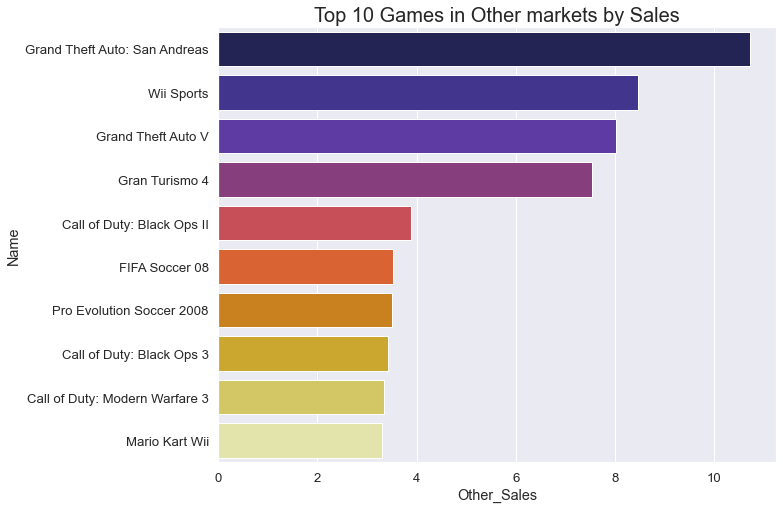

In [48]:
NameTotalGames = df['Other_Sales'].groupby(df['Name']).sum().sort_values(ascending=False).reset_index(name= 'Other_Sales')
NameTotalGames = NameTotalGames.head(10)

plt.figure(figsize=(10,8))
fig = sns.barplot(data=NameTotalGames, x="Other_Sales", y="Name",orient = 'h', palette = "CMRmap")
fig.set_title(label= "Top 10 Games in Other markets by Sales", fontsize= 20)
plt.show()

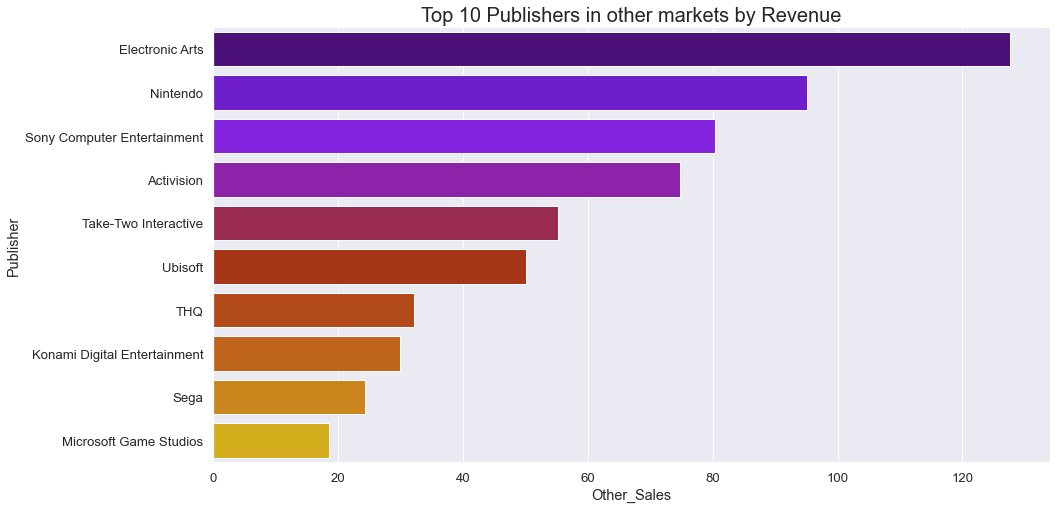

In [49]:
PublisherTotalGames = df['Other_Sales'].groupby(df['Publisher']).sum().sort_values(ascending=False).reset_index(name= 'Other_Sales')
PublisherTotalGames = PublisherTotalGames.head(10)

plt.figure(figsize=(15,8))
fig = sns.barplot(data=PublisherTotalGames, x="Other_Sales", y="Publisher", palette = "gnuplot", orient = 'h')
fig.set_title(label= "Top 10 Publishers in other markets by Revenue", fontsize= 20)


plt.show()

## Multivariate Analysis